In [1]:
import sys
sys.path.append("/home/emastr/phd/")

import jax
from jax import vmap, jit, grad
import jax.numpy as jnp
import numpy as np
from boundary_solvers.geometry import RoundedMicroGeomGenericV2
import matplotlib.pyplot as plt

In [ ]:
import torch
torch.device('cuda:0')
torch.cuda.is_available()

device(type='cuda', index=0)

(-0.031566741392016415,
 0.4205507972091437,
 0.013737152333030555,
 0.25396684331009456)

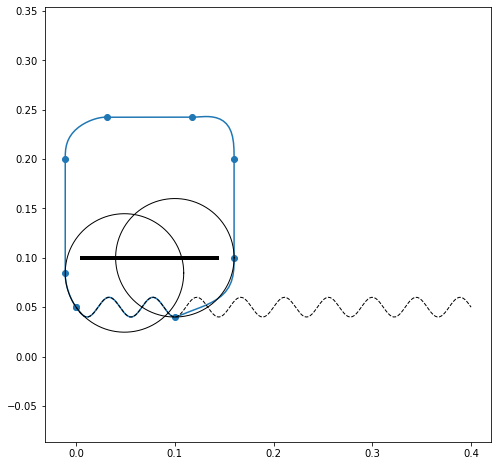

In [2]:
k = 9
scale = 0.1
normal = np.exp(1j * np.pi * (-0.5))
f = lambda t: scale*(normal*1j*t/0.5/np.pi + normal * (-0.5 + np.sin(t * k) * 0.1))
df = lambda t: scale*(normal*1j/0.5/np.pi + normal * k * np.cos(t * k) * 0.1)
ddf = lambda t: scale*(-normal * k*k * np.sin(t * k) * 0.1)

geom = RoundedMicroGeomGenericV2(f, df, ddf, -normal*scale, scale*1., normal, scale*0.6, n_refine=0, n_corner_refine=0)

plt.figure(figsize=(8, 8))
geom.plot(plt.gca(), showsegments=True, show_rounded=True)
z = f(np.linspace(0, 2*np.pi, 200))
plt.plot(z.real, z.imag, 'k--', lw=1)
plt.axis('equal')


